# Exploratory Data Analysis : Breast Cancer Wisconsin Dataset

This notebook explores the Breast Cancer Wisconsin Diagnostic dataset.  
Each record represents a patient sample from a fine needle aspirate (FNA) of a breast mass.  
The goal is to classify tumors as **Malignant (M)** or **Benign (B)**.


## Column Definitions

- **id**: ID number
- **diagnosis**: The diagnosis of breast tissues (M = malignant, B = benign)
- **radius_mean**: Mean of distances from center to points on the perimeter
- **texture_mean**: Standard deviation of gray-scale values
- **perimeter_mean**: Mean size of the core tumor
- **area_mean**: Mean area of the tumor
- **smoothness_mean**: Mean of local variation in radius lengths
- **compactness_mean**: Mean of perimeter^2 / area - 1.0
- **concavity_mean**: Mean of severity of concave portions of the contour
- **concave points_mean**: Mean for number of concave portions of the contour
- **symmetry_mean**: Mean of symmetry
- **fractal_dimension_mean**: Mean for "coastline approximation" - 1
- **radius_se**: Standard error for the mean of distances from center to points on the perimeter
- **texture_se**: Standard error for standard deviation of gray-scale values
- **perimeter_se**: Standard error for perimeter
- **area_se**: Standard error for area
- **smoothness_se**: Standard error for local variation in radius lengths
- **compactness_se**: Standard error for perimeter^2 / area - 1.0
- **concavity_se**: Standard error for severity of concave portions of the contour
- **concave points_se**: Standard error for number of concave portions of the contour
- **symmetry_se**: Standard error for symmetry
- **fractal_dimension_se**: Standard error for "coastline approximation" - 1
- **radius_worst**: "Worst" or largest mean value for mean of distances from center to points on the perimeter
- **texture_worst**: "Worst" or largest mean value for standard deviation of gray-scale values
- **perimeter_worst**: "Worst" or largest mean value for perimeter
- **area_worst**: "Worst" or largest mean value for area
- **smoothness_worst**: "Worst" or largest mean value for local variation in radius lengths
- **compactness_worst**: "Worst" or largest mean value for perimeter^2 / area - 1.0
- **concavity_worst**: "Worst" or largest mean value for severity of concave portions of the contour
- **concave points_worst**: "Worst" or largest mean value for number of concave portions of the contour
- **symmetry_worst**: "Worst" or largest mean value for symmetry
- **fractal_dimension_worst**: "Worst" or largest mean value for "coastline approximation" - 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\SamJutes\\Documents\\personal_projects\\tumor-classification-model\\data\\breast-cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Observations
- Dataset has 569 rows and 32 columns.
- No missing values detected.

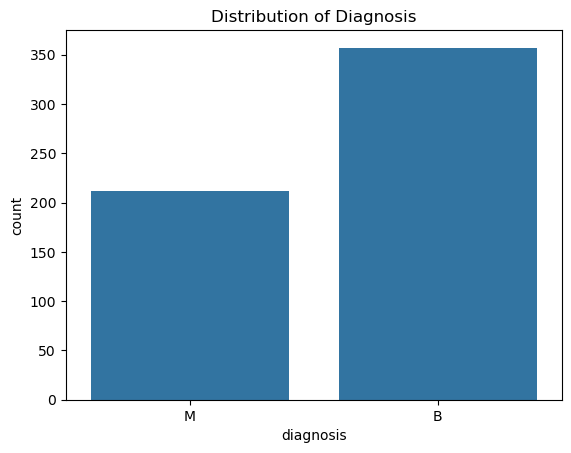

In [6]:
sns.countplot(x="diagnosis", data=df)
plt.title("Distribution of Diagnosis")
plt.show()

## Observations
- Dataset is slightly imbalanced

In [7]:
# Split the dataset by diagnosis for easier comparison
df_malignant = df[df['diagnosis'] == 'M']
df_benign = df[df['diagnosis'] == 'B']

In [8]:
print("Malignant samples:", df_malignant.shape)
print("Benign samples:", df_benign.shape)

Malignant samples: (212, 32)
Benign samples: (357, 32)


In [9]:
features = df.columns.drop(['id', 'diagnosis'])

In [10]:
# Compute means for each feature
malignant_means = df_malignant[features].mean()
benign_means = df_benign[features].mean()

In [11]:
# Calculating percent difference for each feature 
percent_diff = ((malignant_means - benign_means) / malignant_means) * 100

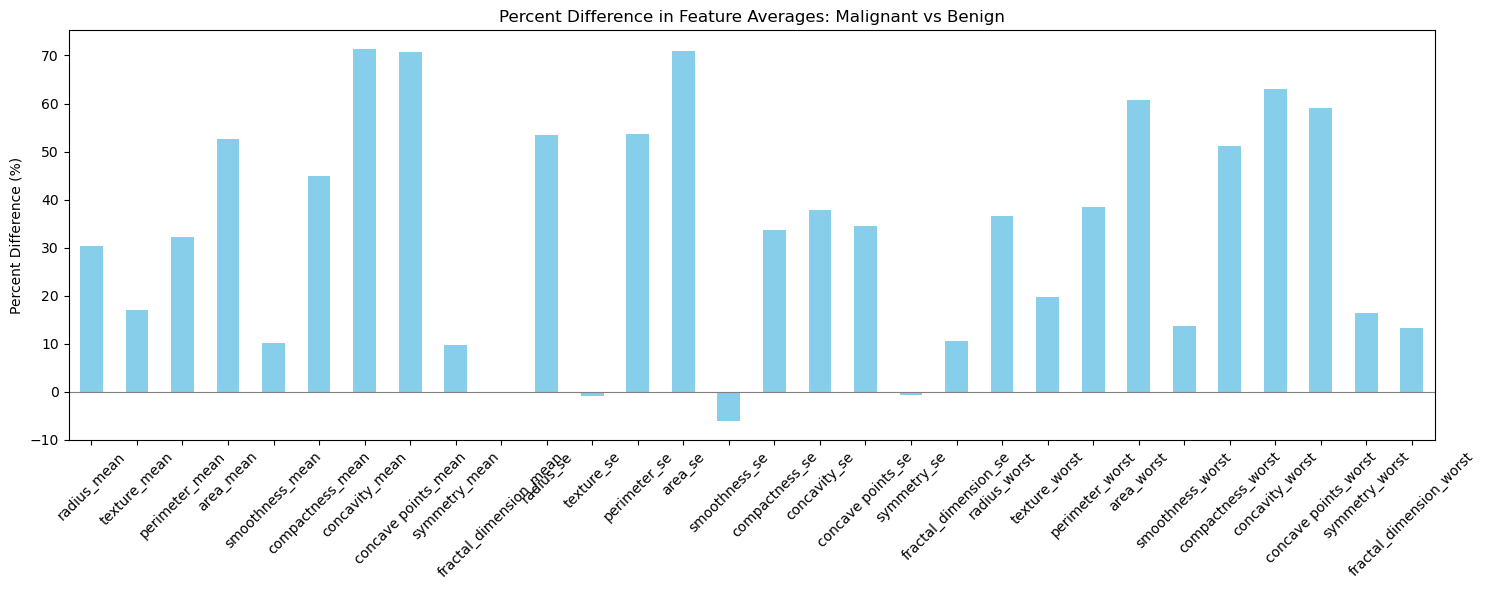

In [12]:
# Visualizing percent differences for each feature
plt.figure(figsize=(15,6))
percent_diff.plot(kind='bar', color='skyblue')
plt.axhline(0, color='gray', linewidth=0.8)
plt.ylabel('Percent Difference (%)')
plt.title('Percent Difference in Feature Averages: Malignant vs Benign')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Compute absolute percent differences
abs_percent_diff = percent_diff.abs()

In [14]:
# Sort from largest to smallest
ranked_features = abs_percent_diff.sort_values(ascending=False)

In [15]:
# Display
print(ranked_features)

concavity_mean             71.352697
area_se                    70.917230
concave points_mean        70.772353
concavity_worst            63.107930
area_worst                 60.704154
concave points_worst       59.149779
perimeter_se               53.738344
radius_se                  53.358973
area_mean                  52.698145
compactness_worst          51.264461
compactness_mean           44.840661
perimeter_worst            38.455305
concavity_se               37.842555
radius_worst               36.693066
concave points_se          34.546189
compactness_se             33.588994
perimeter_mean             32.323364
radius_mean                30.443555
texture_worst              19.793630
texture_mean               17.080120
symmetry_worst             16.453559
smoothness_worst           13.728957
fractal_dimension_worst    13.206475
fractal_dimension_se       10.495121
smoothness_mean            10.127305
symmetry_mean               9.705598
smoothness_se               6.132770
t

### Observations 

1. **Top differentiating features are shape and size related**
   - `concavity_mean`, `area_se`, `concave points_mean`, `concavity_worst`, `area_worst`, `concave points_worst`
   - Malignant tumors tend to have larger, more irregular shapes than benign tumors.

2. **Geometric features are stronger discriminators than texture features**
   - Features like `radius`, `perimeter`, `area`, `concavity`, and `compactness` show high percent differences.
   - Features such as `texture_mean`, `smoothness`, `symmetry`, and `fractal_dimension` show much smaller differences.

3. **Low-difference features contribute little to distinguishing groups**
   - Examples: `texture_se`, `symmetry_se`, `fractal_dimension_mean`
   - These features may be less informative for classification tasks.

4. **Implications for modeling**
   - Focus on top features based on percent difference threshold


In [39]:
threshold = 10
top_features = ranked_features[ranked_features >= threshold].index.tolist()

In [40]:
X_top = df[top_features]

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_top.columns
vif_data["VIF"] = [variance_inflation_factor(X_top.values, i) for i in range(X_top.shape[1])]

# Sort by highest VIF
vif_data = vif_data.sort_values("VIF", ascending=False)
print(vif_data)

                    feature           VIF
17              radius_mean  56501.865519
16           perimeter_mean  55284.800200
13             radius_worst   8520.353900
11          perimeter_worst   4345.383162
8                 area_mean   1088.701628
4                area_worst    988.406828
24          smoothness_mean    329.854818
22  fractal_dimension_worst    223.272367
7                 radius_se    220.851303
21         smoothness_worst    208.615439
6              perimeter_se    192.978495
19             texture_mean    179.331161
10         compactness_mean    175.661321
18            texture_worst    172.130225
0            concavity_mean    150.076144
2       concave points_mean    148.922546
5      concave points_worst    140.328442
9         compactness_worst    109.719792
3           concavity_worst     82.375164
1                   area_se     63.555781
14        concave points_se     50.189626
20           symmetry_worst     44.016180
15           compactness_se     39

## Observations
- Initial VIF analysis showed extremely high multicollinearity across features.  
- This is largely due to having multiple variants of each feature (`_mean`, `_se`, `_worst`) that measure similar underlying tumor characteristics.  
- VIF reduction was applied across **all features**, regardless of type.  


In [43]:
X = df.drop(columns=["id", "diagnosis"], errors="ignore")

In [44]:
# Standardize feature values for numerical stability
X_scaled = (X - X.mean()) / X.std()

In [45]:
# Function to calculate VIF for all features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    return vif_data.sort_values("VIF", ascending=False)


In [46]:
# Iteratively drop features with high VIF
def reduce_vif(X, thresh=10):
    while True:
        vif_data = calculate_vif(X)
        max_vif = vif_data["VIF"].max()
        if max_vif > thresh:
            drop_feature = vif_data.iloc[0]["feature"]
            print(f"Dropping '{drop_feature}' with VIF={max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
        else:
            break
    return X, calculate_vif(X)

# Run the reduction on features
X_reduced, final_vif = reduce_vif(X_scaled, thresh=10)

print("\nRemaining features after VIF reduction:")
print(final_vif)

Dropping 'radius_mean' with VIF=3806.12
Dropping 'radius_worst' with VIF=616.35
Dropping 'perimeter_mean' with VIF=325.64
Dropping 'perimeter_worst' with VIF=123.26
Dropping 'concavity_mean' with VIF=64.65
Dropping 'radius_se' with VIF=35.62
Dropping 'compactness_worst' with VIF=33.96
Dropping 'concave points_worst' with VIF=30.60
Dropping 'area_mean' with VIF=25.39
Dropping 'compactness_mean' with VIF=18.84
Dropping 'texture_worst' with VIF=17.23
Dropping 'area_se' with VIF=16.33
Dropping 'concavity_worst' with VIF=15.51

Remaining features after VIF reduction:
                    feature       VIF
2       concave points_mean  8.984360
13               area_worst  8.675765
16  fractal_dimension_worst  8.485684
14         smoothness_worst  8.373798
15           symmetry_worst  7.264684
4    fractal_dimension_mean  7.168068
1           smoothness_mean  6.621582
8            compactness_se  5.889510
12     fractal_dimension_se  5.734092
10        concave points_se  4.440585
11           

## Observations
- The process iteratively removed top features with VIF > 10 until only those with acceptable collinearity remained.  
- The final set of features includes a mix of `mean`, `se`, and `worst` variables, selected because: 
  - They collectively minimize multicollinearity.  
  - The retained features capture complementary information about tumor structure and variation.  
  - This approach avoids discarding potentially informative features.

In [49]:
final_vif['feature'].tolist

<bound method IndexOpsMixin.tolist of 2         concave points_mean
13                 area_worst
16    fractal_dimension_worst
14           smoothness_worst
15             symmetry_worst
4      fractal_dimension_mean
1             smoothness_mean
8              compactness_se
12       fractal_dimension_se
10          concave points_se
11                symmetry_se
6                perimeter_se
9                concavity_se
3               symmetry_mean
7               smoothness_se
5                  texture_se
0                texture_mean
Name: feature, dtype: object>